
**Step 1: Install Tensorflow**

In [1]:
!pip install tensorflow

**Step 2:**
Make folders for dataset

In [2]:
import os

os.makedirs("/content/sample_data/kaggle/")
os.chdir("/content/sample_data/kaggle/")

**Step 6: Connect to Google Drive**

Make connection to the Google Drive

In [4]:
# make connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 3:**
Copy dataset from Google Drive to Collab

In [5]:
cp /content/drive/MyDrive/kaggle_dataset/breast-cancer-semantic-segmentation-bcss.zip /content/sample_data/kaggle/breast-cancer-semantic-segmentation-bcss.zip

**Step 4:**
Unzip dataset

In [6]:
!unzip -x breast-cancer-semantic-segmentation-bcss.zip

Streaming output truncated to the last 5000 lines.
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_5120_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_512_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_5632_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_0_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_1024_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_1536_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_2048_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_2560_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_3072_size512.png  
  inflating: BCSS_512/val_512/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_512_3584_size

**Step 5: Setup Environment**

First, set up your environment by installing necessary libraries and setting the working directory. If you've already set up your environment as per your previous code, you can skip this step.

In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import glob
import gc  # Garbage Collector interface

# After predicting or loading large data, clear unused variables and collect garbage
gc.collect()  # Collect garbage to free memory

0

**Step 7: Load the Model**

Load the trained model from the file you saved earlier.

In [2]:
# Load the saved model
model_path = '/content/drive/MyDrive/SavingsOfTrainingModels/cancer_predict_trainigs.h5'
model = load_model(model_path)

**Step 8: Prepare the Test Data**

You need to prepare your test data similar to how you prepared your training data. I'll assume you have a separate folder for test images.

In [3]:
# Update these paths according to your test data location
test_image_paths = glob.glob('/content/sample_data/kaggle/BCSS/test/*.png')  # Update path as needed

# Function to load and convert test images
# Function to process and predict images in batches
def predict_in_batches(image_paths, image_size, model, batch_size=5):  # You can adjust the batch size
    num_images = len(image_paths)
    predictions = []

    for i in range(0, num_images, batch_size):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = np.zeros((len(batch_paths), *image_size, 3), dtype=np.float32)

        # Load and preprocess images
        for j, path in enumerate(batch_paths):
            img = load_img(path, target_size=image_size, color_mode='rgb')
            img = img_to_array(img) / 255.0
            batch_images[j] = img

        # Predict current batch
        batch_predictions = model.predict(batch_images)
        predictions.extend(batch_predictions)

    return np.array(predictions)

# Define the image size
image_size = (512, 512)

# Load test images
test_images = predict_in_batches(test_image_paths, image_size, model)

1/1 [==============================] - 1s 534ms/step


**Step 9: Make Predictions**

Use the loaded model to predict the test data.

In [4]:
def load_batch_images(image_paths, image_size, num=10):
    images = []
    for path in image_paths[:num]:  # Load only the first 'num' images
        img = load_img(path, target_size=image_size)
        images.append(img_to_array(img) / 255.0)
    return np.array(images)

**Step 10: Display the Results**

You may want to display the results to visually inspect how well your model is performing. You can plot the original test images alongside their predicted masks.

In [5]:
import matplotlib.pyplot as plt

def plot_predictions(original_image_paths, predictions, image_size, num=10):
    # Load a batch of original images
    original_images = load_batch_images(original_image_paths, image_size, num=num)

    # Plotting
    plt.figure(figsize=(20, 4))
    for i in range(num):
        # Display original
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis("off")

        # Display prediction
        ax = plt.subplot(2, num, i + 1 + num)
        plt.imshow(predictions[i].squeeze(), cmap='gray')  # Make sure predictions are the correct shape
        plt.title("Predicted")
        plt.axis("off")

    plt.show()

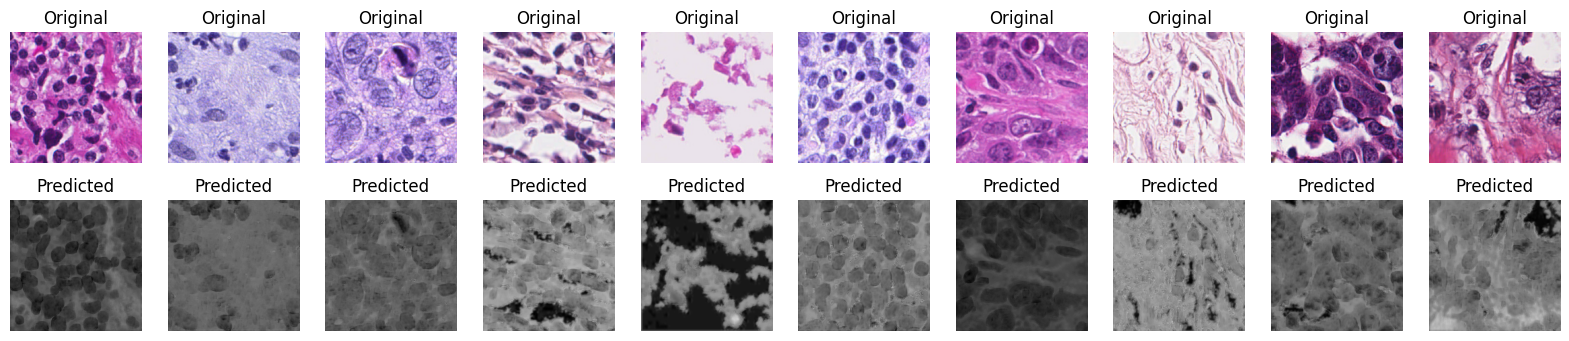

In [7]:
# Plot some test images and their predicted masks
plot_predictions(test_image_paths, test_images, image_size)